<a href="https://colab.research.google.com/github/Imen-Mourali/Insights-on-Jazz-Standards/blob/main/Insights_on_Jazz_Standards.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Insights on jazz standards based on data from a streaming platform**

Here we analyse Spotify data provided by Echonest (now part of Spotify) . 

The analysis covers retreiving relevant data from a database, data preparation and visualization.

This analysis is based on python. It uses pandas for data preparation, matplotlib, seaborn and plotly for data visualization.

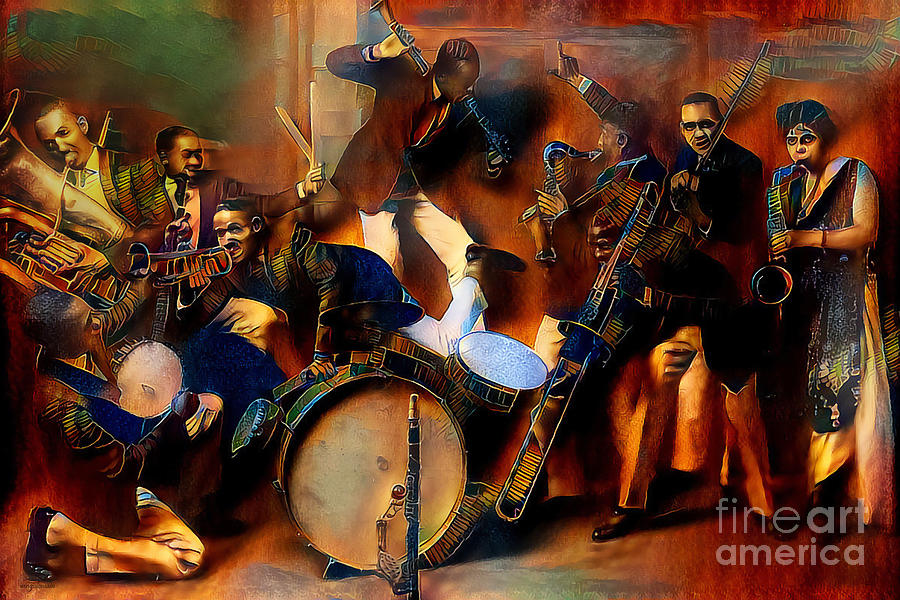

## Data Preparation 

In [11]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Reading the dataset
data = pd.read_csv('/content/drive/MyDrive/Data/data_genre.csv')

# Printing a full summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10131 entries, 0 to 10130
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        10131 non-null  object 
 1   danceability      9473 non-null   float64
 2   energy            9473 non-null   float64
 3   key               9473 non-null   float64
 4   loudness          9473 non-null   float64
 5   mode              9473 non-null   float64
 6   speechiness       9473 non-null   float64
 7   acousticness      9476 non-null   float64
 8   instrumentalness  9476 non-null   float64
 9   liveness          9476 non-null   float64
 10  valence           9476 non-null   float64
 11  tempo             9476 non-null   float64
 12  type              9476 non-null   object 
 13  id                9476 non-null   object 
 14  uri               9476 non-null   object 
 15  track_href        9476 non-null   object 
 16  analysis_url      9476 non-null   object

In [4]:
# Returning the first 5 rows 
data.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist,genre;
0,0,0.741,0.739,11.0,-4.627,0.0,0.0386,0.005410,0.026900,0.0496,...,audio_features,0ikuoejgnBNitqFArW6fFk,spotify:track:0ikuoejgnBNitqFArW6fFk,https://api.spotify.com/v1/tracks/0ikuoejgnBNi...,https://api.spotify.com/v1/audio-analysis/0iku...,262857.0,4.0,Dark River - Festival Version,Sebastian Ingrosso,absolute music;
1,1,0.649,0.973,6.0,-4.391,1.0,0.0882,0.000639,0.662000,0.1330,...,audio_features,4nrK0G6pOEuhMxn3hAaava,spotify:track:4nrK0G6pOEuhMxn3hAaava,https://api.spotify.com/v1/tracks/4nrK0G6pOEuh...,https://api.spotify.com/v1/audio-analysis/4nrK...,279375.0,4.0,Derp - Original Mix,Bassjackers,absolute music;
2,2,0.791,0.862,9.0,-3.240,0.0,0.1100,0.037000,0.000022,0.0814,...,audio_features,7ef4DlsgrMEH11cDZd32M6,spotify:track:7ef4DlsgrMEH11cDZd32M6,https://api.spotify.com/v1/tracks/7ef4DlsgrMEH...,https://api.spotify.com/v1/audio-analysis/7ef4...,214847.0,4.0,One Kiss (with Dua Lipa),Calvin Harris,absolute music;
3,3,0.738,0.861,2.0,-4.141,1.0,0.2370,0.318000,0.001820,0.3250,...,audio_features,0M98PvIvx7vZ8LDpzMw1hB,spotify:track:0M98PvIvx7vZ8LDpzMw1hB,https://api.spotify.com/v1/tracks/0M98PvIvx7vZ...,https://api.spotify.com/v1/audio-analysis/0M98...,189052.0,4.0,Kill This Love,BLACKPINK,absolute music;
4,4,0.647,0.844,0.0,-3.756,1.0,0.0457,0.013700,0.000658,0.1020,...,audio_features,3AzjcOeAmA57TIOr9zF1ZW,spotify:track:3AzjcOeAmA57TIOr9zF1ZW,https://api.spotify.com/v1/tracks/3AzjcOeAmA57...,https://api.spotify.com/v1/audio-analysis/3Azj...,193829.0,4.0,Physical,Dua Lipa,absolute music;


In [5]:
# Dropping multiple columns that are not revelant for our study
data=data.drop(['Unnamed: 0','type',	'id',	'uri',	'track_href',	'analysis_url',	'duration_ms',	'time_signature', 'key','loudness','mode','speechiness','liveness','tempo',], axis=1)

# Renaming the column "genre;"
data.rename(columns = {'genre;':'genre'}, inplace = True)

# Dropping duplicated rows and removing rows containing missing values
data.drop_duplicates().dropna(axis=0)

,danceability,energy,acousticness,instrumentalness,valence,song_name,artist,genre
0,0.741,0.739,0.005410,0.026900,0.425,Dark River - Festival Version,Sebastian Ingrosso,absolute music;
1,0.649,0.973,0.000639,0.662000,0.221,Derp - Original Mix,Bassjackers,absolute music;
2,0.791,0.862,0.037000,0.000022,0.592,One Kiss (with Dua Lipa),Calvin Harris,absolute music;
3,0.738,0.861,0.318000,0.001820,0.580,Kill This Love,BLACKPINK,absolute music;
4,0.647,0.844,0.013700,0.000658,0.746,Physical,Dua Lipa,absolute music;
...,...,...,...,...,...,...,...,...
10121,0.557,0.533,0.049200,0.000000,0.233,Here Without You,3 Doors Down,rock;
10123,0.450,0.525,0.522000,0.000002,0.371,When You're Gone,The Cranberries,rock;
10125,0.469,0.561,0.008710,0.000005,0.356,One Of Us - Short Version,Joan Osborne,rock;
10128,0.391,0.815,0.017700,0.002260,0.647,Eyes Without A Face,Billy Idol,rock;


### What are the existing music genres, and how many songs are there in each genre ?

In [6]:
#what are the genres in Spotify Dataset and how many songs are there for each genre  
a = data['genre'].value_counts()
a

popular;           1814
rock;              1290
folk;              1258
hiphop;            1097
rnb;               1059
jazz;              1043
electronic;        1017
absolute music;     554
classical;          336
absolute music        3
electronic            2
jazz                  1
popular               1
rock                  1
;                     1
Name: genre, dtype: int64

Popular music has the highest number of song, while classical music has the lowest.

It is surprising that there are more jazz tracks than electronic ones !

PS : "jazz;" and "jazz" are considered as different genres, as well as for "popular;" and "popular", "electronic;" and "electronic", etc. There is even a genre called ";" ! 

Anyway, we enjoy cleansing data 😋





In [7]:
# Correct errors in column names
data['genre'] = data['genre'].replace(['popular;', 'rock;', 'folk;','hiphop','rnb;','jazz;','electronic;','absolute music;','classical;'], 
                                      ['popular', 'rock', 'folk','hiphop','rnb','jazz','electronic','absolute music','classical'])

# Deleting the row where the genre is ;
index = data[ (data['genre'] == ';')].index
data.drop(index , inplace=True)


In [8]:
# Listing the correct genres with corresponding counts of tracks
genre = data['genre'].value_counts()
genre


popular           1815
rock              1291
folk              1258
hiphop;           1097
rnb               1059
jazz              1044
electronic        1019
absolute music     557
classical          336
Name: genre, dtype: int64

"genre" feature is nominal. We will use a pie chart to represent the relative percentage of each genre with respect to whole data.

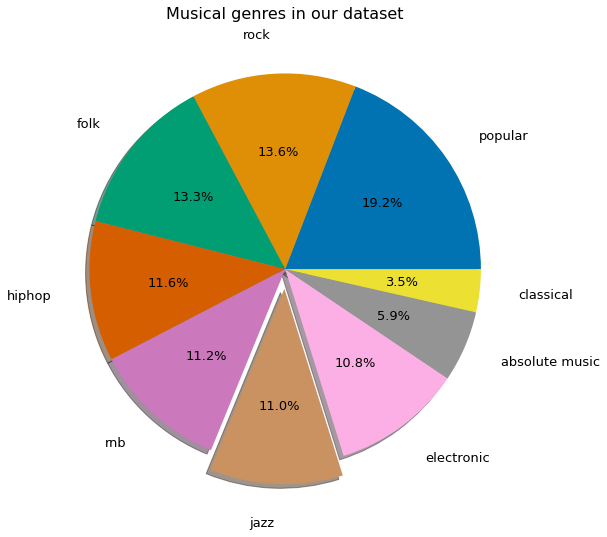

In [12]:
# Plotting pie chart 
plt.figure(figsize=(9,9))
colors = sns.color_palette('colorblind')
lab = ['popular','rock', 'folk', 'hiphop', 'rnb',  'jazz', 'electronic', 'absolute music','classical' ]
explode = (0, 0,0,0,0, 0.1,0,0,0) 
plt.pie(genre, colors = colors, labels=lab, textprops={"fontsize":13}, explode=explode, autopct='%1.1f%%', shadow=True, labeldistance=1.2)
plt.title("Musical genres in our dataset", fontsize=16)
plt.show()

Jazz tracks represent 11% of the total tracks !

In [13]:
#Select only jazz songs
jazz = data.loc[data['genre'] == 'jazz'].drop_duplicates()
jazz = jazz.drop(['genre'], axis=1)

## Top 5 jazzwomen/jazzmen

In [14]:
# Calculating the number of tracks for each artist
artists = jazz['artist'].value_counts()

# Printing the first 5 elements of our pandas Series "artists"
artists[0:5]

Cafe Music BGM channel    99
New York Jazz Lounge      98
Ella Fitzgerald           17
Keith Jarrett              9
Chet Baker                 9
Name: artist, dtype: int64

Cafe Music BGM channel and New York Jazz Lounge are two channels for background music. 

Ella Fitzgerald is the artist with the most songs in our dataset, followed by Chet Baker and Keith Jarrett.
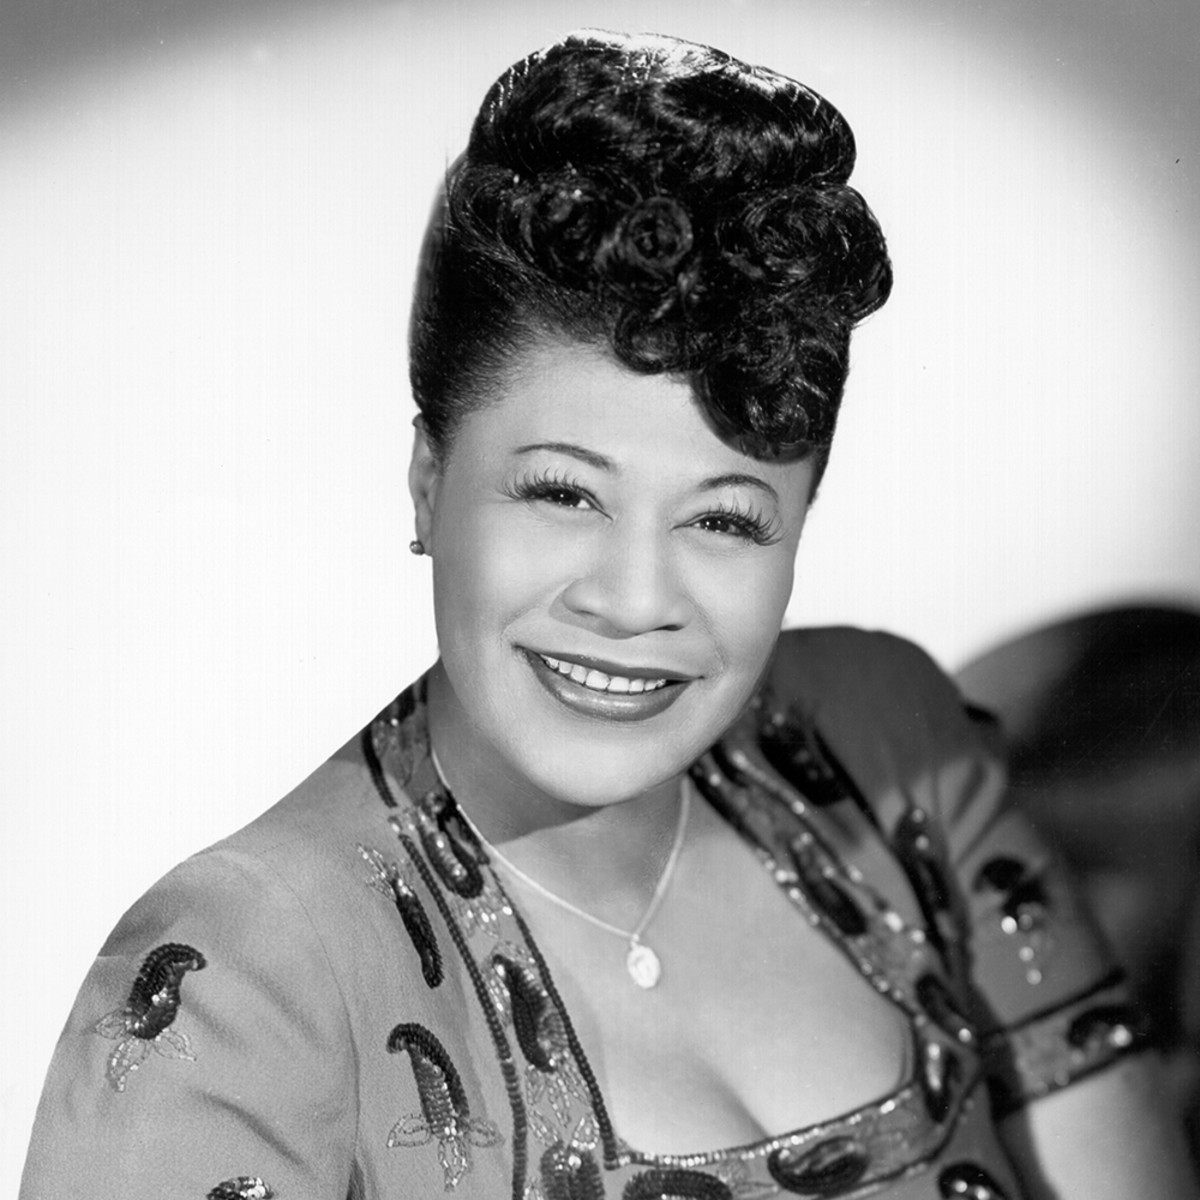

## Songs by Ella Fitzgerald in our dataset 

In [15]:
# Extracting songs where the artist feature is "Ella Fitzgeral"
Ella = jazz[jazz['artist']=='Ella Fitzgerald'].song_name
Ella

4818                     Dream A Little Dream Of Me
4998                                 Cry Me A River
5000                          In A Sentimental Mood
5001                                     Nature Boy
5002                                 April In Paris
5003                                       Tenderly
5004                                     Blue Skies
5006                            Lullaby Of Birdland
5010               Summertime - Live (1958/Chicago)
5015        These Foolish Things (Remind Me Of You)
5016                       Isn't This A Lovely Day?
5125                             Autumn In New York
5149    Dream A Little Dream Of Me - Single Version
5169                         It's Only A Paper Moon
5179               How Long Has This Been Going On?
5209                                 Cheek To Cheek
5701                                     My Romance
Name: song_name, dtype: object

## Top standards

“A standard is a popular song that is well known, frequently performed, and remains in the popular repertoire for at least several years.” [1]



In [17]:
# Top standards
standards = jazz['song_name'].value_counts()
standards[0:7]

Moon River                         5
My Funny Valentine                 4
Stormy Weather                     4
My One And Only Love               4
Summertime                         4
There Will Never Be Another You    3
Never Let Me Go                    3
Name: song_name, dtype: int64

Let's now analyse the covers of some standards 

# Analysing the different records of top standards

We will analyse the covers of each standard according to 5 features [2]: 
- **danceability**	: Numerical, danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **energy**	: Numerical, Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- **acousticness** : Numerical, Confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **instrumentalness**	: Numerical, predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **valence** :  Numerical, Measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

### Moon River
au.jpeg

Moon River, composed by Henry Mancini and performed by Audrey Hepburn in the 1961 movie Breakfast at Tiffany's, is the most frequent standard in our dataset.

Let's see who are the artists who covered it ? And how are their covers different  ?

In [18]:
moon_river = jazz[jazz['song_name']=='Moon River']
moon_river

,danceability,energy,acousticness,instrumentalness,valence,song_name,artist
5020,0.171,0.0632,0.945,0.000027,0.168,Moon River,Frank Sinatra
5047,0.513,0.1620,0.826,0.349000,0.159,Moon River,New York Jazz Lounge
5157,0.319,0.1570,0.987,0.849000,0.266,Moon River,Vince Guaraldi Trio
5355,0.601,0.0371,0.885,0.578000,0.121,Moon River,The Sweetgreens
5698,0.299,0.2260,0.890,0.000235,0.235,Moon River,Nicole Henry


Moon River was covered by Frank Sinatra, Vince Guaraldi Trio, The Sweetgreens, Nicole Henry and the New York Jazz Lounge channel.

In [19]:
# Creating a dictionary from "moon_river" data
df_moon_river = pd.DataFrame({'Artist' : ['Frank Sinatra','Frank Sinatra','Frank Sinatra','Frank Sinatra','Frank Sinatra',
                                'New York Jazz Lounge','New York Jazz Lounge','New York Jazz Lounge','New York Jazz Lounge','New York Jazz Lounge',
                                'Vince Guaraldi Trio','Vince Guaraldi Trio','Vince Guaraldi Trio','Vince Guaraldi Trio','Vince Guaraldi Trio',
                                'The Sweetgreens','The Sweetgreens','The Sweetgreens','The Sweetgreens','The Sweetgreens',
                                'Nicole Henry','Nicole Henry','Nicole Henry','Nicole Henry','Nicole Henry'],
                    'Feature' : ['danceability',	'energy',	'acousticness',	'instrumentalness',	'valence', 'danceability',	'energy',	'acousticness',	'instrumentalness',	'valence',
                                 'danceability',	'energy',	'acousticness',	'instrumentalness',	'valence','danceability',	'energy',	'acousticness',	'instrumentalness',	'valence',
                                 'danceability',	'energy',	'acousticness',	'instrumentalness',	'valence'],
                    'Value' : [0.171,	0.0632,	0.945,	0.000027,	0.168, 0.513,	0.1620,	0.826,	0.349000,	0.159, 0.319,	0.1570,	0.987,	0.849000,	0.266,
                               0.601,	0.0371,	0.885,	0.578000,	0.121, 0.299,	0.2260,	0.890,	0.000235,	0.235]  
})

# Plotting a radar chart from the dictionary
fig = px.line_polar(df_moon_river, r='Value', theta='Feature', color='Artist', line_close=True)
fig.show()

Vince Guaraldi Trio cover is instrumental, it is the most positive of all the others. The Sweetgreens cover is instrumental too, it is the most negative of all the other, but also the more danceable one.

Frank Sinatra and Nicole Henry covers are the most similar to each other, but the second one is more energetic.

### My Funny Valentine 

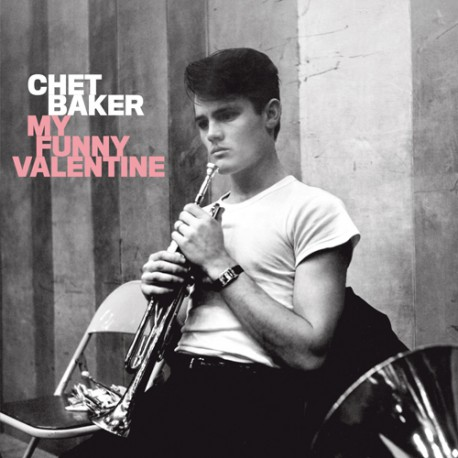

In [20]:
my_funny_valentine = jazz[jazz['song_name']=='My Funny Valentine']
my_funny_valentine

,danceability,energy,acousticness,instrumentalness,valence,song_name,artist
5051,0.479,0.08650,0.932,0.044900,0.0893,My Funny Valentine,New York Jazz Lounge
5058,0.281,0.33200,0.760,0.120000,0.0766,My Funny Valentine,New York Jazz Lounge
5147,0.438,0.00756,0.941,0.006430,0.2770,My Funny Valentine,Chet Baker
5717,0.346,0.22000,0.875,0.000254,0.2340,My Funny Valentine,Seal


In [21]:
# Creating a dictionary from "my_funny_valentine" data
df_my_funny_valentine = pd.DataFrame({'Artist' : ['New York Jazz Lounge 1','New York Jazz Lounge 1','New York Jazz Lounge 1','New York Jazz Lounge 1','New York Jazz Lounge 1',
                                'New York Jazz Lounge 2','New York Jazz Lounge 2','New York Jazz Lounge 2','New York Jazz Lounge 2','New York Jazz Lounge 2',
                                'Chet Baker','Chet Baker','Chet Baker','Chet Baker','Chet Baker',
                                'Seal','Seal','Seal','Seal','Seal',],
                    'Feature' : ['danceability',	'energy',	'acousticness',	'instrumentalness',	'valence', 'danceability',	'energy',	'acousticness',	'instrumentalness',	'valence',
                                 'danceability',	'energy',	'acousticness',	'instrumentalness',	'valence','danceability',	'energy',	'acousticness',	'instrumentalness',	'valence'],
                    'Value' : [0.479,	0.08650,	0.932,	0.044900,	0.0893,	0.281,	0.33200,	0.760,	0.120000,	0.0766, 0.438,	0.00756,	0.941,	0.006430,	0.2770, 0.346,	0.22000,	0.875,	0.000254,	0.2340]
    
})

# Plotting a radar chart from the dictionary
fig = px.line_polar(df_my_funny_valentine, r='Value', theta='Feature', color='Artist', line_close=True)
fig.show()


Chet Baker and Seal's covers contain spoken words. They are almost similar from a point of view of valence, acousticness and danceability, but Seal's version is more energetic.

### Summertime

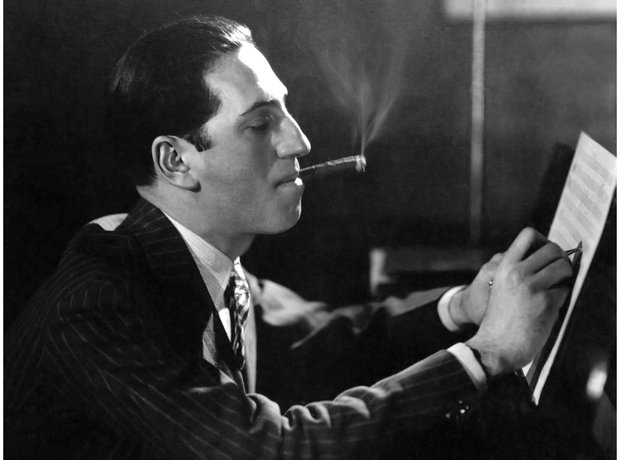

Summertime is an aria composed in 1934 by George Gershwin for the 1935 opera Porgy and Bess. The hit went on to be covered by thousands of artists, in every genre from disco to reggae.


In [22]:
summertime = jazz[jazz['song_name']=='Summertime']
summertime

,danceability,energy,acousticness,instrumentalness,valence,song_name,artist
4793,0.518,0.128,0.939,0.9120,0.118,Summertime,Moonlight Jazz Trio
5057,0.569,0.522,0.700,0.0770,0.552,Summertime,New York Jazz Lounge
5180,0.446,0.191,0.925,0.5740,0.291,Summertime,Albert Ayler
5216,0.356,0.324,0.704,0.0025,0.438,Summertime,Charlie Parker


In [23]:
# Creating a dictionary from summertime data
df_summertime = pd.DataFrame({'Artist' : ['Moonlight Jazz Trio','Moonlight Jazz Trio','Moonlight Jazz Trio','Moonlight Jazz Trio','Moonlight Jazz Trio',
                                'New York Jazz Lounge','New York Jazz Lounge','New York Jazz Lounge','New York Jazz Lounge','New York Jazz Lounge',
                                'Albert Ayler','Albert Ayler','Albert Ayler','Albert Ayler','Albert Ayler',
                                'Charlie Parker','Charlie Parker','Charlie Parker','Charlie Parker','Charlie Parker',],
                    'Feature' : ['danceability',	'energy',	'acousticness',	'instrumentalness',	'valence', 'danceability',	'energy',	'acousticness',	'instrumentalness',	'valence',
                                 'danceability',	'energy',	'acousticness',	'instrumentalness',	'valence','danceability',	'energy',	'acousticness',	'instrumentalness',	'valence'],
                    'Value' : [0.518,	0.128,	0.939,	0.9120,	0.118, 0.569,	0.522,	0.700,	0.0770,	0.552, 0.446,	0.191,	0.925,	0.5740,	0.291,	0.356,	0.324,	0.704,	0.0025,	0.438]
    
})

# Plotting a radar chart from the dictionary
fig = px.line_polar(df_summertime, r='Value', theta='Feature', color='Artist', line_close=True)
fig.show()

Moonlight Jazz Trio and Albert Ayler have two instrumental and acoustic covers, they are almost similar but the second one is more positive.

New York Jazz Lounge has the most positive, energetic and danceable cover.

### My One and Only Love 

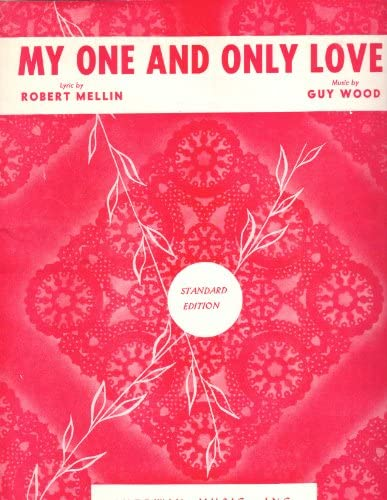

"My One and Only Love" is a 1953 popular song with music written by Guy Wood and lyrics by Robert Mellin. Notable renditions by Frank Sinatra (1953), and later by John Coltrane and Johnny Hartman (1963), have made the song part of the jazz standard musical repertoire. [3]

In [24]:
my_one_and_only = jazz[jazz['song_name']=='My One and Only Love']
my_one_and_only

,danceability,energy,acousticness,instrumentalness,valence,song_name,artist
5060,0.592,0.339,0.898,0.8170,0.223,My One and Only Love,New York Jazz Lounge
5583,0.487,0.146,0.982,0.9380,0.109,My One and Only Love,Jill & Henry
5715,0.669,0.297,0.787,0.0462,0.229,My One and Only Love,Karen Souza


In [25]:
# Creating a dictionary from my_one_and_only data
df_my_one= pd.DataFrame({'Artist' : ['New York Jazz Lounge','New York Jazz Lounge','New York Jazz Lounge','New York Jazz Lounge','New York Jazz Lounge',
                                'Jill & Henry','Jill & Henry','Jill & Henry','Jill & Henry','Jill & Henry',
                                'Karen Souza','Karen Souza','Karen Souza','Karen Souza','Karen Souza'],
                    'Feature' : ['danceability',	'energy',	'acousticness',	'instrumentalness',	'valence',
                                 'danceability',	'energy',	'acousticness',	'instrumentalness',	'valence',
                                 'danceability',	'energy',	'acousticness',	'instrumentalness',	'valence'],
                    'Value' : [0.592,	0.339,	0.898,	0.8170,	0.223, 0.487,	0.146,	0.982,	0.9380,	0.109, 0.669,	0.297,	0.787,	0.0462,	0.229]
    
})

# Creating the radar chart from te dictionary
fig = px.line_polar(df_my_one, r='Value', theta='Feature', color='Artist', line_close=True)
fig.show()

New York Jazz Lounge and Karen Suza's covers are almost similar, but the fist is instrumental and the second contains spoke word.

Jil & Henry's cover is the less danceable, energetic and positive.

### Summary

According to our dataset :

Jazz tracks represent 11% of the total number of tracks.

Ella Fitzgerald is the artist with the highest number of songs. 

Top jazz standards are : Moon River, My Funny Valentine,Stormy Weather, My One And Only Love, Summertime and There Will Never Be Another You. They have instrumental and non instrumental versions, with different energy or/and danceability or/and valence values, but with acousticness values quite close.



### References

[1] Enjoying Jazz by Henry Martin Schirmer Books, 1986 ISBN 0-02-873130-1

[2] https://rpubs.com/PeterDola/SpotifyTracks

[3] https://en.wikipedia.org/wiki/My_One_and_Only_Love